In [1]:
# einige Bibs
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
from random import randint
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [2]:
# Main values for trial
x_wert   = 0.2
z_wert   = 0.55
x_label = "X"
y_label = "Y"
z_label = "Z"

# Datengenerierung 
mdays     = 2200
mproducts = 1500
mmaxsale  = 15000
mshuffle  = True #different sale per product

In [3]:
def make_forcast( days, products, maxsale, shuffle ):
    # try to generate random sales so that we have x,y,z cases
    sales = []
    sales = np.zeros((products,days), dtype=int)

    for pro in range( products ):
        # create empty array 
        timeline = []
        timeline = np.zeros(days)
        # sample how many values we should find
        # random limit
        #repl = randint( int(days *.8), days)
        repl = days

        #shuffle sale value per product    
        if shuffle:
            s_val = randint( int( maxsale * .05 ), maxsale)
        else:
            s_val = maxsale

        # 1 more X
        # 2 more Y
        # 3 more balance x,y
        # 4 more Z
        mode = randint( 1, 4)
        if mode == 1:
            low_lim = 0.85
        elif mode == 2:
            low_lim = 0.35
        elif mode == 3:
            low_lim = 0.45
        else:
            low_lim = 0.00001

        for i in range( repl ):
            #idx = randint(0, days-1)
            idx = i
            sales[pro][idx] += randint( int( s_val * low_lim ), s_val)
    return sales

def get_cla( koeffizient ):
    if koeffizient <= x_wert:
        mycla = x_label
    elif koeffizient > z_wert:
        mycla = z_label
    else:
        mycla = y_label
    return mycla

def calc_koef( myval ):
    mystd = np.std( myval )
    myavg = np.mean( myval )
    mykoef = 0.0
    if mystd > 0 and myavg > 0:        
        mykoef = mystd /myavg
    return mykoef
# cnt error

def cnt_err():
    maxele = len( X_test )
    wrong = 0
    for idx in range(maxele):
        y_pred = clf.predict( [X_test[idx]] )
        #print( le.inverse_transform( y_pred ), le.inverse_transform( y_test[idx] ) )
        if y_pred  != y_test[idx]:
            wrong += 1
    err_rate = wrong * 100 / maxele
    
    return err_rate

def print_err():
    print( "Error rate:", cnt_err(), "%" )
    
# calculate the y-label classification
def calc_classification( mpro, s_tab):    
    y_lab = np.chararray(mpro)
    for pro in range(mpro):
        mykoef = calc_koef( s_tab[pro] )
        #print( sales[pro], mykoef, get_cla( mykoef ))
        y_lab[pro] = get_cla( mykoef )        
    return y_lab

In [4]:
# generate forcast
sales = make_forcast( mdays, mproducts, mmaxsale, mshuffle )
y_all = calc_classification( mproducts, sales )
Counter( y_all )

Counter({b'Z': 375, b'X': 370, b'Y': 755})

In [5]:
# extrakt classified products
def get_sale_per_prod( my_label, my_y ):
    x_sales = []
    cnt_ins = 0
    for idx in range(mproducts):
        label = my_y[idx].decode()
        if  label == str( my_label ):
            x_sales = np.append([sales[idx]], x_sales )
            cnt_ins +=1

    # shape to be for each product        
    return cnt_ins, x_sales.reshape(cnt_ins,mdays)

In [6]:
# get x-data
cnt, x_sales = get_sale_per_prod( x_label, y_all )

# label is taken directly from forcast

#y_tot = x_sales[:,mdays-3:]
y = x_sales[:,mdays-3:mdays-2]   # y label is last column
X = x_sales[:,:mdays-3]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)

# try Ridge Regression
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1, solver="cholesky" ).fit(X_train, y_train)

In [7]:
# y_pred = clf.predict(X_test)
# for i in range(len(y_pred)):
#     mykoef = calc_koef( X_test[i] )
#     print( get_cla( mykoef )    )
#     print( X_test[i].mean() )    
#     print( y_test[i].mean() )
#     print( y_pred[i] ) 
#     print()

In [8]:
def generate_forcast( my_X_new ):
    day2predict = int( len(my_X_new[0]) * 7 / 8 )
    for i in range( day2predict ):    
        y_pred = clf.predict(my_X_new)
        y_pred = y_pred.reshape(len(y_pred),1)        
        my_X_new = np.append(my_X_new, y_pred, axis=1 )[:,1:]
    return my_X_new

def generate_plot( X_tst, X_prd ):
    # product to compare
    p2c = 5#10

    fig, axes = plt.subplots(p2c, 2, sharex='col')
    fig.set_size_inches(18, int(p2c * 6) )

    pro_nr = len(X_prd[:,1]) # count of products

    #generate by random plot train/test/prediction
    for i in range(p2c):
        p_n = randint(0,(pro_nr-1))    
        axes[i,0].set_title(p_n)
        axes[i,0].plot(X_tst[p_n])    
        axes[i,1].set_title(p_n)
        axes[i,1].plot(X_prd[p_n])
    

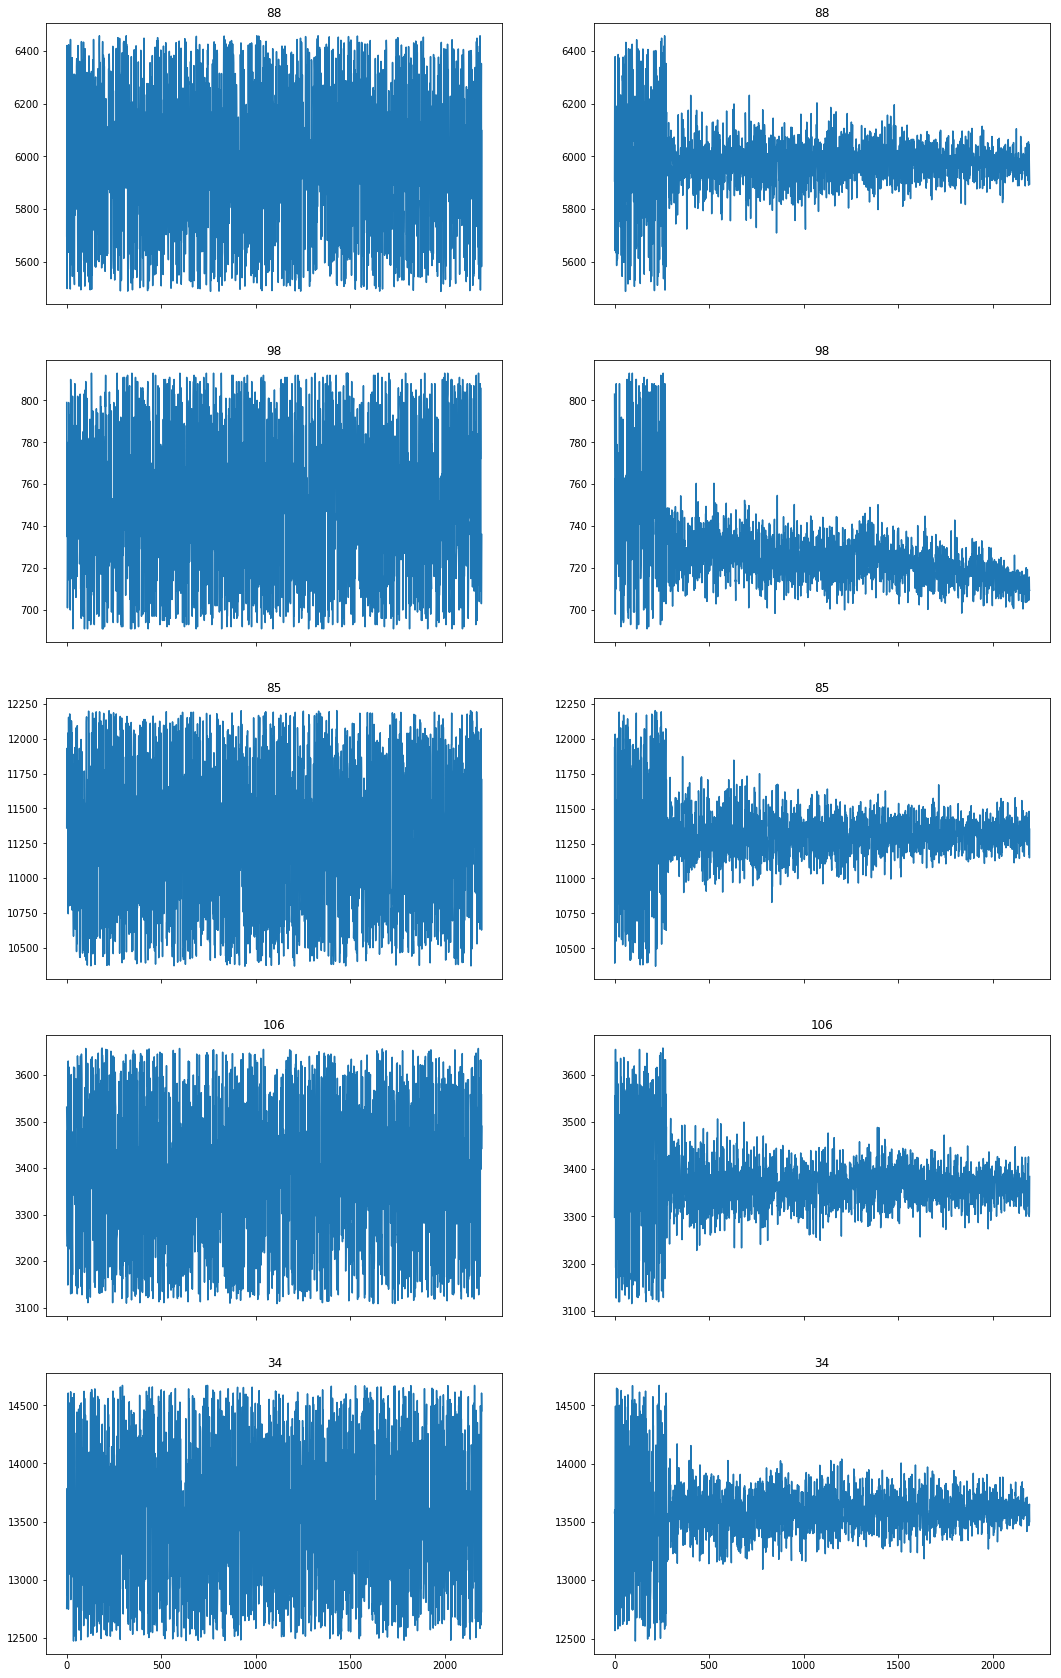

In [9]:
X_new = generate_forcast( X_test )
generate_plot( X_test, X_new )

In [10]:
# get y-data
cnt, x_sales = get_sale_per_prod( y_label, y_all )

# label is taken directly from forcast

#y_tot = x_sales[:,mdays-3:]
y = x_sales[:,mdays-3:mdays-2]   # y label is last column
X = x_sales[:,:mdays-3]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)

# try Ridge Regression
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1, solver="cholesky" ).fit(X_train, y_train)


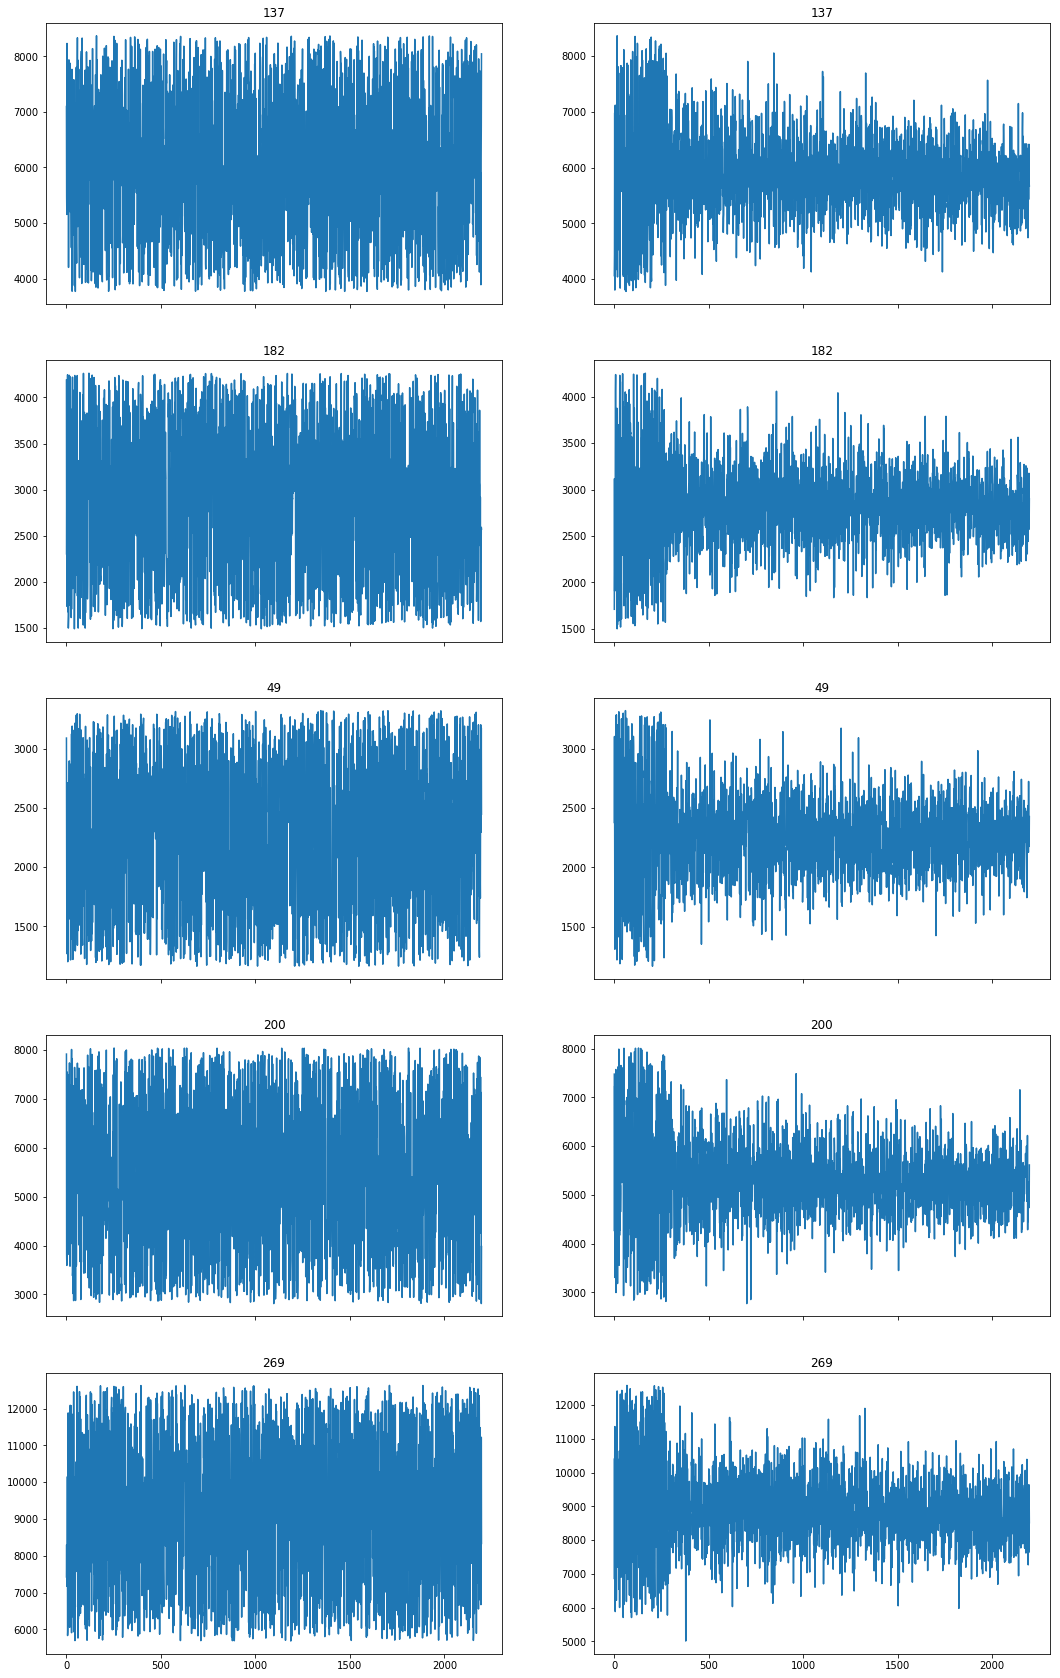

In [11]:
X_new = generate_forcast( X_test )
generate_plot( X_test, X_new )

In [12]:
# get z-data
cnt, x_sales = get_sale_per_prod( z_label, y_all )

# label is taken directly from forcast

#y_tot = x_sales[:,mdays-3:]
y = x_sales[:,mdays-3:mdays-2]   # y label is last column
X = x_sales[:,:mdays-3]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)

# try Ridge Regression
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1, solver="cholesky" ).fit(X_train, y_train)


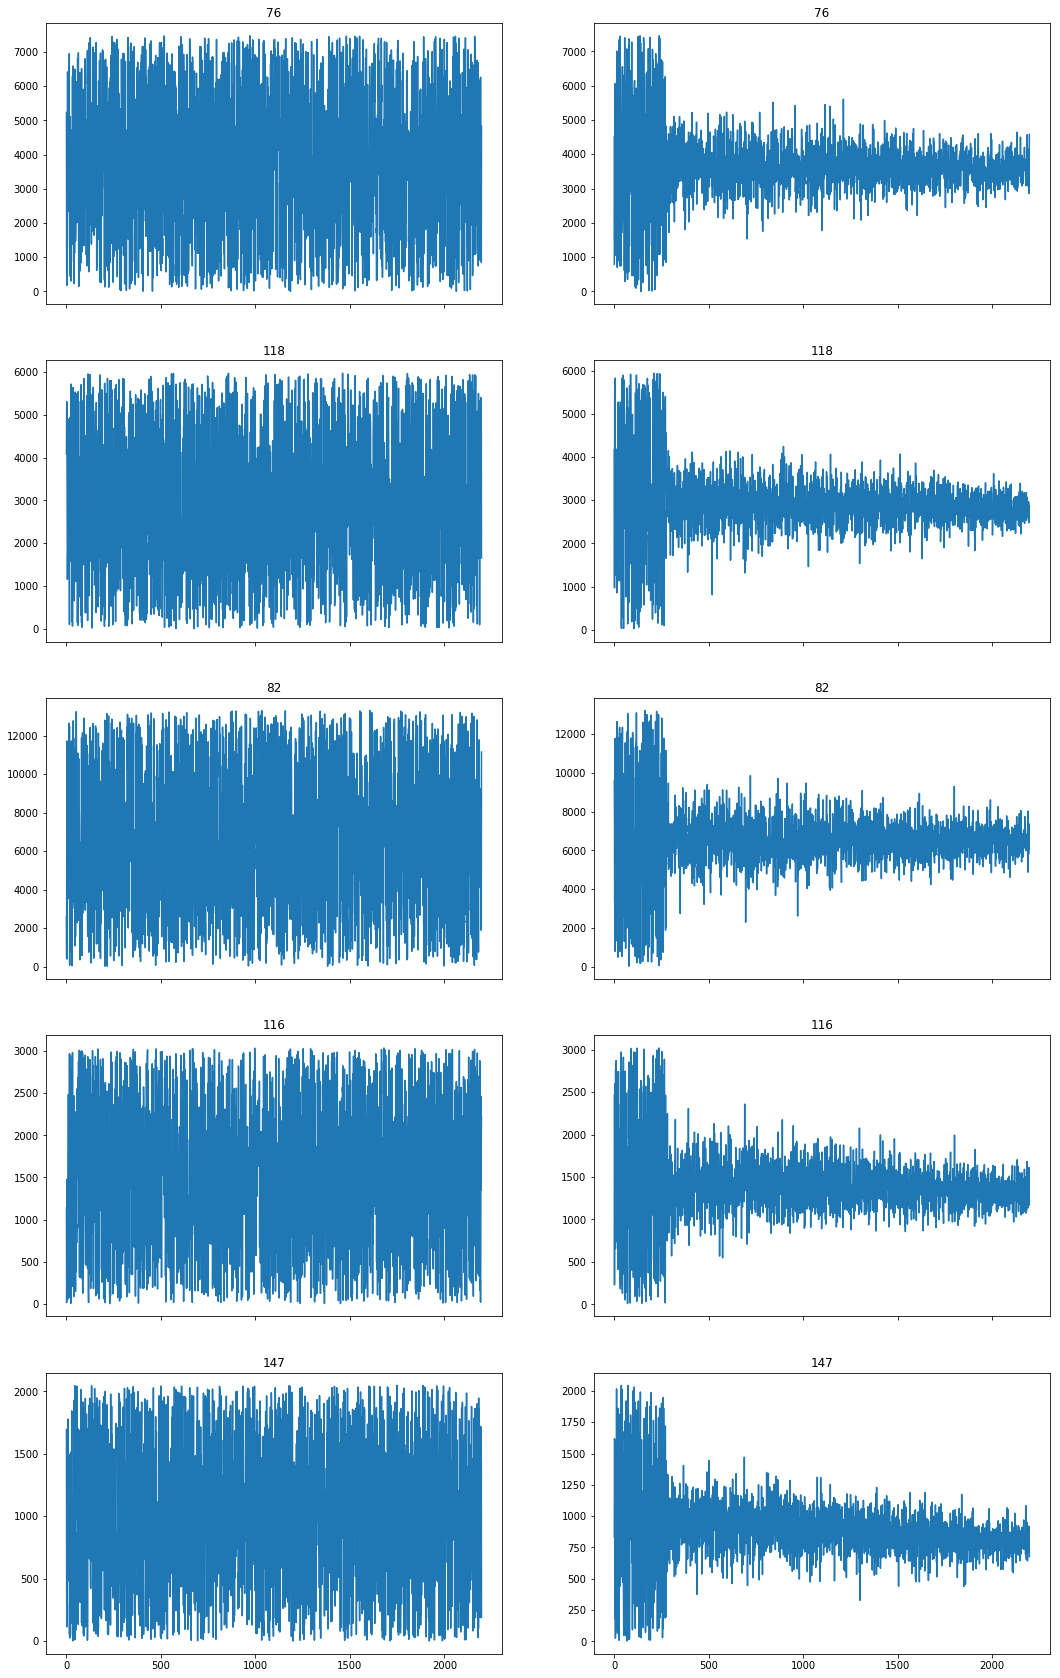

In [13]:
X_new = generate_forcast( X_test )
generate_plot( X_test, X_new )

In [14]:
#####################################
#                                   #
#                MLP                #
#                                   #
#####################################
my_iter = 450000
my_hdl  = 25

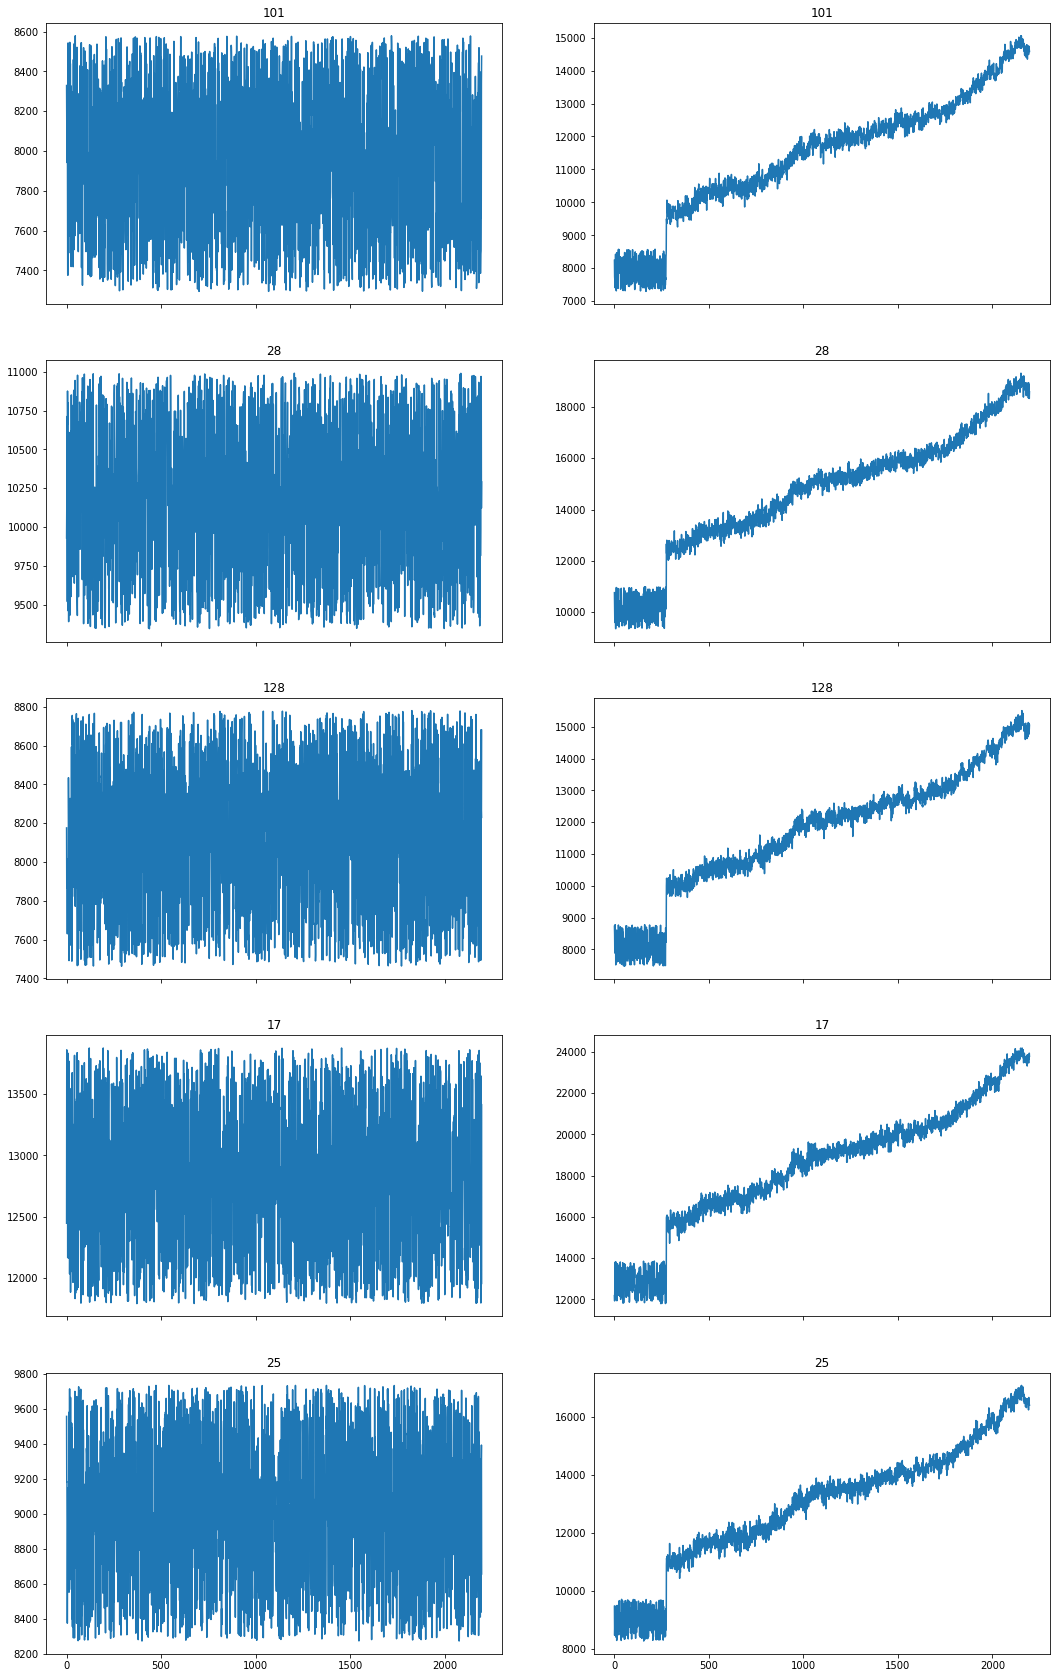

In [15]:
# get x-data
cnt, x_sales = get_sale_per_prod( x_label, y_all )

# label is taken directly from forcast

#y_tot = x_sales[:,mdays-3:]
y = np.ravel( x_sales[:,mdays-3:mdays-2] )   # y label is last column
X = x_sales[:,:mdays-3]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)

# try Gradient Boost
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor( random_state=0, max_iter=my_iter, hidden_layer_sizes = (my_hdl,), activation = 'relu' ).fit(X_train, y_train)

X_new = generate_forcast( X_test )
generate_plot( X_test, X_new )

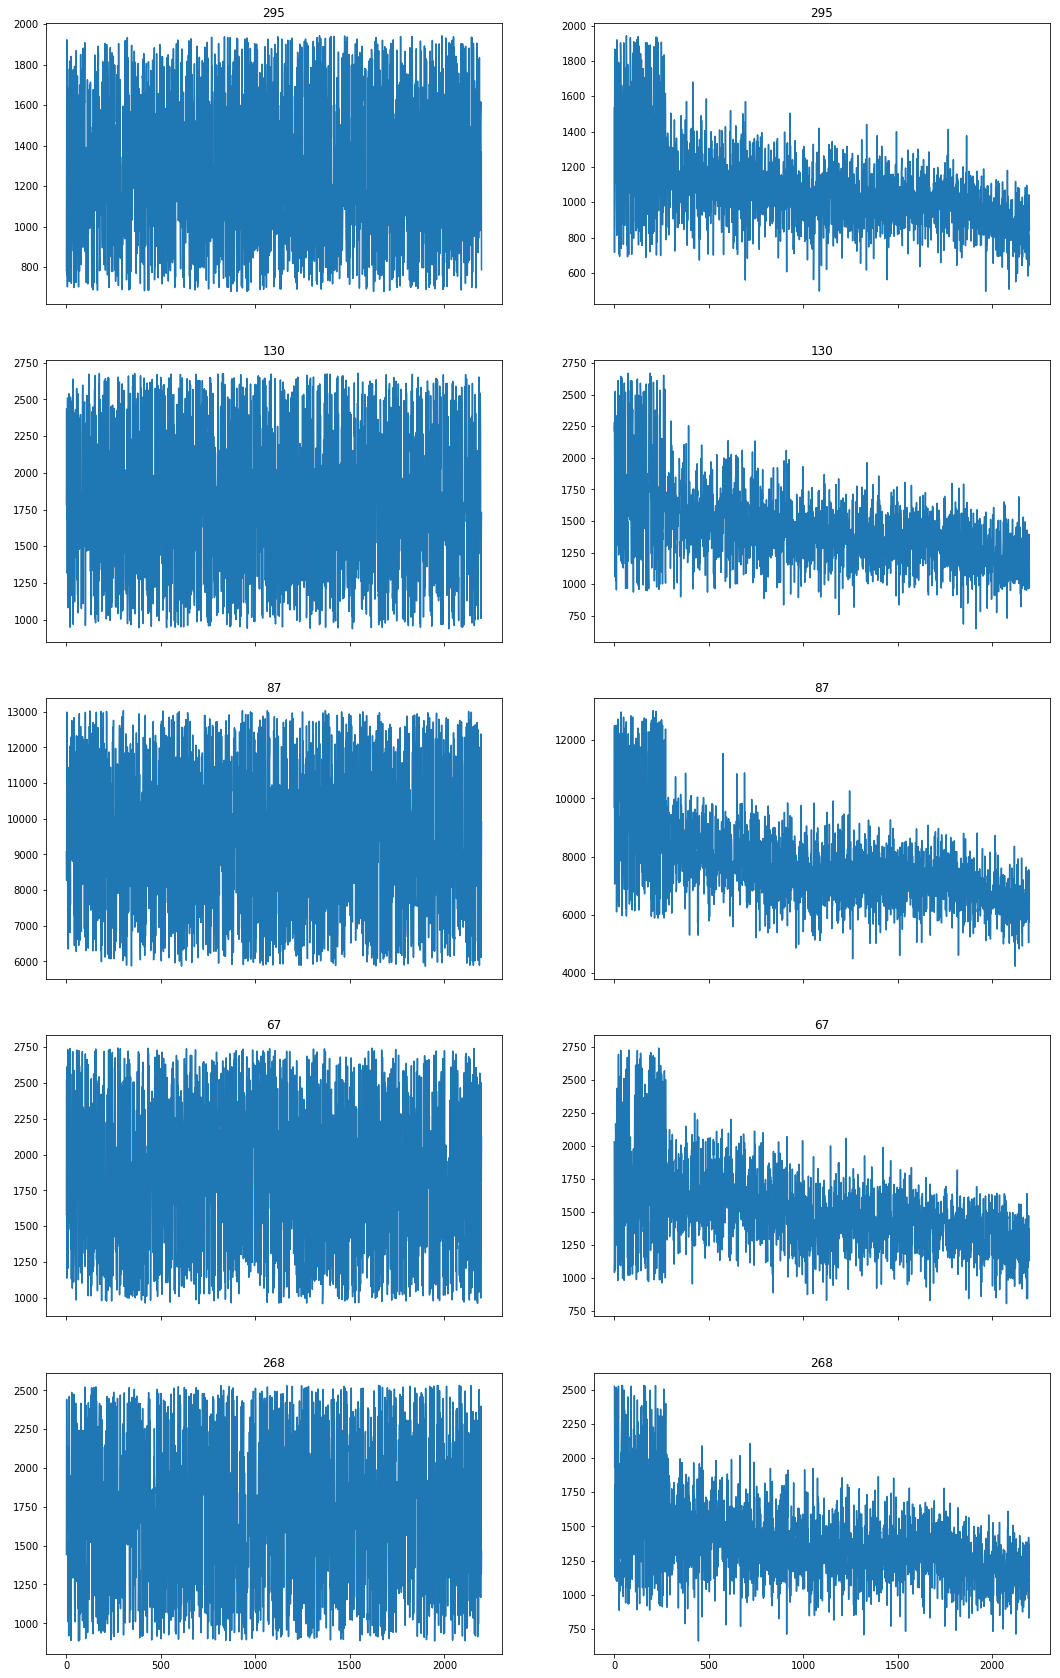

In [16]:
# get y-data
cnt, x_sales = get_sale_per_prod( y_label, y_all )

# label is taken directly from forcast

#y_tot = x_sales[:,mdays-3:]
y = np.ravel( x_sales[:,mdays-3:mdays-2] )   # y label is last column
X = x_sales[:,:mdays-3]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)

# try Gradient Boost
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor( random_state=0, max_iter=my_iter, hidden_layer_sizes = (my_hdl,), activation = 'relu' ).fit(X_train, y_train)

X_new = generate_forcast( X_test )
generate_plot( X_test, X_new )

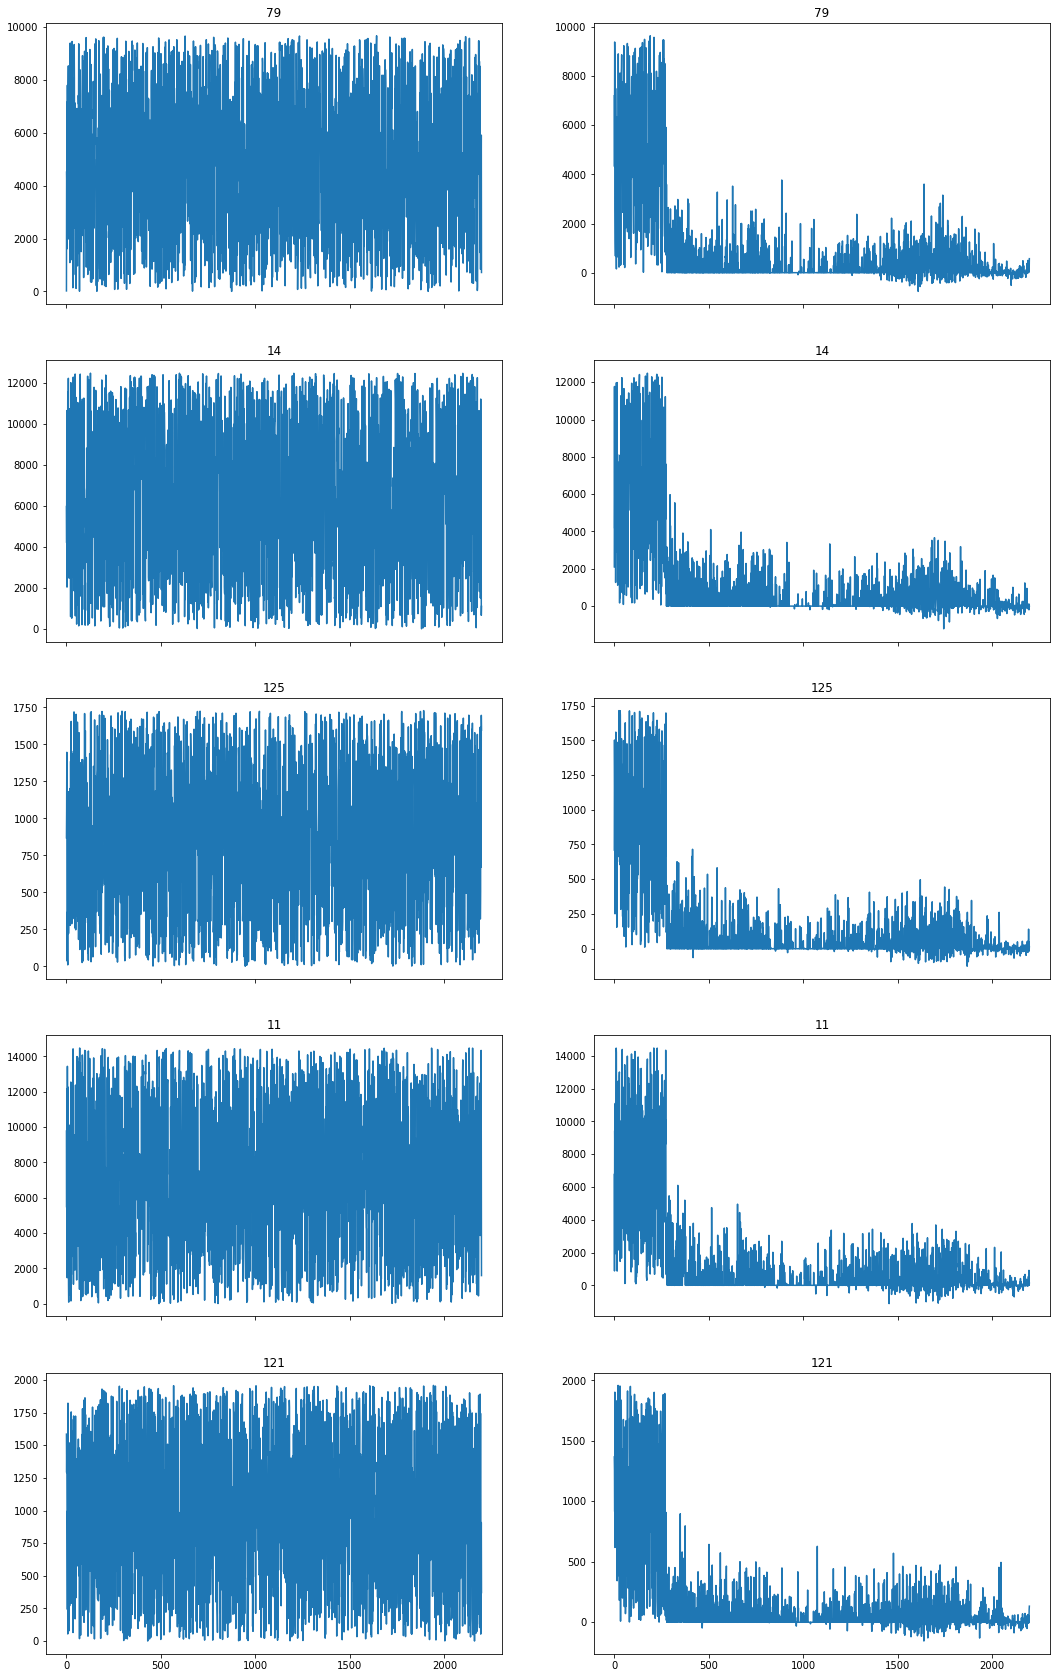

In [17]:
# get z-data
cnt, x_sales = get_sale_per_prod( z_label, y_all )

# label is taken directly from forcast

#y_tot = x_sales[:,mdays-3:]
y = np.ravel( x_sales[:,mdays-3:mdays-2] )   # y label is last column
X = x_sales[:,:mdays-3]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)

# try Gradient Boost
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor( random_state=0, max_iter=my_iter, hidden_layer_sizes = (my_hdl,), activation = 'relu' ).fit(X_train, y_train)

X_new = generate_forcast( X_test )
generate_plot( X_test, X_new )

In [18]:
#eof